In [1]:
import pandas as pd
import numpy as np

import os
import sys

# librosa is a Python library for analyzing audio and music. It can be used to extract the data from the audio files we will see it later.
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# to play the audio files
from IPython.display import Audio

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
Ravdess = "./audio_data/ravdess/audio_speech_actors_01-24/"
Crema = "./audio_data/crema/"
Tess = "./audio_data/tess/TESS toronto emotional speech set data/TESS Toronto emotional speech set data/"
Savee = "./audio_data/savee/"
print(os.listdir(Ravdess))
print(os.listdir(Crema))
print(os.listdir(Tess))
print(os.listdir(Savee))

['Actor_16', 'Actor_11', 'Actor_18', 'Actor_20', 'Actor_21', 'Actor_19', 'Actor_10', 'Actor_17', 'Actor_04', 'Actor_03', 'Actor_02', 'Actor_05', 'Actor_12', 'Actor_15', 'Actor_23', 'Actor_24', 'Actor_22', 'Actor_14', 'Actor_13', 'Actor_09', 'Actor_07', 'Actor_06', 'Actor_01', 'Actor_08']
['1022_ITS_ANG_XX.wav', '1037_ITS_ANG_XX.wav', '1060_ITS_NEU_XX.wav', '1075_ITS_NEU_XX.wav', '1073_IOM_DIS_XX.wav', '1066_IOM_DIS_XX.wav', '1078_IWL_SAD_XX.wav', '1029_TAI_FEA_XX.wav', '1039_IEO_SAD_MD.wav', '1008_TAI_HAP_XX.wav', '1018_TSI_FEA_XX.wav', '1028_IEO_SAD_HI.wav', '1039_TSI_HAP_XX.wav', '1064_ITS_HAP_XX.wav', '1071_ITS_HAP_XX.wav', '1045_ITS_FEA_XX.wav', '1050_ITS_FEA_XX.wav', '1018_IWL_ANG_XX.wav', '1059_IEO_ANG_MD.wav', '1054_MTI_DIS_XX.wav', '1041_MTI_DIS_XX.wav', '1048_IEO_ANG_HI.wav', '1042_ITS_SAD_XX.wav', '1019_TAI_NEU_XX.wav', '1057_ITS_SAD_XX.wav', '1028_TSI_NEU_XX.wav', '1087_IOM_ANG_XX.wav', '1039_IEO_HAP_LO.wav', '1018_IEO_FEA_LO.wav', '1079_DFA_NEU_XX.wav', '1063_IWW_DIS_XX.wav

In [3]:
# Ravdess = "/Users/adrianclement/dev/kaggle/ravdess/audio_speech_actors_01-24/"

ravdess_directory_list = os.listdir(Ravdess)
print(ravdess_directory_list)

file_emotion = []
file_path = []
for dir in ravdess_directory_list:
    # as their are 20 different actors in our previous directory we need to extract files for each actor.
    actor = os.listdir(Ravdess + dir)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        # third part in each file represents the emotion associated to that file.
        file_emotion.append(int(part[2]))
        file_path.append(Ravdess + dir + '/' + file)

# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)

# changing integers to actual emotions.
Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)

Ravdess_df.head()

['Actor_16', 'Actor_11', 'Actor_18', 'Actor_20', 'Actor_21', 'Actor_19', 'Actor_10', 'Actor_17', 'Actor_04', 'Actor_03', 'Actor_02', 'Actor_05', 'Actor_12', 'Actor_15', 'Actor_23', 'Actor_24', 'Actor_22', 'Actor_14', 'Actor_13', 'Actor_09', 'Actor_07', 'Actor_06', 'Actor_01', 'Actor_08']


,Emotions,Path
0,angry,./audio_data/ravdess/audio_speech_actors_01-24...
1,fear,./audio_data/ravdess/audio_speech_actors_01-24...
2,fear,./audio_data/ravdess/audio_speech_actors_01-24...
3,angry,./audio_data/ravdess/audio_speech_actors_01-24...
4,disgust,./audio_data/ravdess/audio_speech_actors_01-24...


In [4]:
crema_directory_list = os.listdir(Crema)

file_emotion = []
file_path = []

for file in crema_directory_list:
    # storing file paths
    file_path.append(Crema + file)
    # storing file emotions
    part=file.split('_')
    if part[2] == 'SAD':
        file_emotion.append('sad')
    elif part[2] == 'ANG':
        file_emotion.append('angry')
    elif part[2] == 'DIS':
        file_emotion.append('disgust')
    elif part[2] == 'FEA':
        file_emotion.append('fear')
    elif part[2] == 'HAP':
        file_emotion.append('happy')
    elif part[2] == 'NEU':
        file_emotion.append('neutral')
    else:
        file_emotion.append('Unknown')
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Crema_df = pd.concat([emotion_df, path_df], axis=1)
Crema_df.head()

,Emotions,Path
0,angry,./audio_data/crema/1022_ITS_ANG_XX.wav
1,angry,./audio_data/crema/1037_ITS_ANG_XX.wav
2,neutral,./audio_data/crema/1060_ITS_NEU_XX.wav
3,neutral,./audio_data/crema/1075_ITS_NEU_XX.wav
4,disgust,./audio_data/crema/1073_IOM_DIS_XX.wav


In [5]:
tess_directory_list = os.listdir(Tess)

file_emotion = []
file_path = []

for dir in tess_directory_list:
    directories = os.listdir(Tess + dir)
    for file in directories:
        part = file.split('.')[0]
        part = part.split('_')[2]
        if part=='ps':
            file_emotion.append('surprise')
        else:
            file_emotion.append(part)
        file_path.append(Tess + dir + '/' + file)
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Tess_df = pd.concat([emotion_df, path_df], axis=1)
Tess_df.head()

,Emotions,Path
0,disgust,./audio_data/tess/TESS toronto emotional speec...
1,disgust,./audio_data/tess/TESS toronto emotional speec...
2,disgust,./audio_data/tess/TESS toronto emotional speec...
3,disgust,./audio_data/tess/TESS toronto emotional speec...
4,disgust,./audio_data/tess/TESS toronto emotional speec...


In [6]:
savee_directory_list = os.listdir(Savee)

file_emotion = []
file_path = []

for file in savee_directory_list:
    file_path.append(Savee + file)
    part = file.split('_')[1]
    ele = part[:-6]
    if ele=='a':
        file_emotion.append('angry')
    elif ele=='d':
        file_emotion.append('disgust')
    elif ele=='f':
        file_emotion.append('fear')
    elif ele=='h':
        file_emotion.append('happy')
    elif ele=='n':
        file_emotion.append('neutral')
    elif ele=='sa':
        file_emotion.append('sad')
    else:
        file_emotion.append('surprise')
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Savee_df = pd.concat([emotion_df, path_df], axis=1)
Savee_df.head()

,Emotions,Path
0,sad,./audio_data/savee/JK_sa01.wav
1,sad,./audio_data/savee/JK_sa15.wav
2,neutral,./audio_data/savee/DC_n13.wav
3,surprise,./audio_data/savee/DC_su09.wav
4,neutral,./audio_data/savee/DC_n07.wav


In [7]:
# creating Dataframe using all the 4 dataframes we created so far.
# data_path = pd.concat([Ravdess_df, Crema_df, Tess_df, Savee_df], axis = 0)
data_path = pd.concat([Ravdess_df, Crema_df, Tess_df, Savee_df], axis = 0)
data_path.to_csv("data_path.csv",index=False)
data_path.head()

,Emotions,Path
0,angry,./audio_data/ravdess/audio_speech_actors_01-24...
1,fear,./audio_data/ravdess/audio_speech_actors_01-24...
2,fear,./audio_data/ravdess/audio_speech_actors_01-24...
3,angry,./audio_data/ravdess/audio_speech_actors_01-24...
4,disgust,./audio_data/ravdess/audio_speech_actors_01-24...


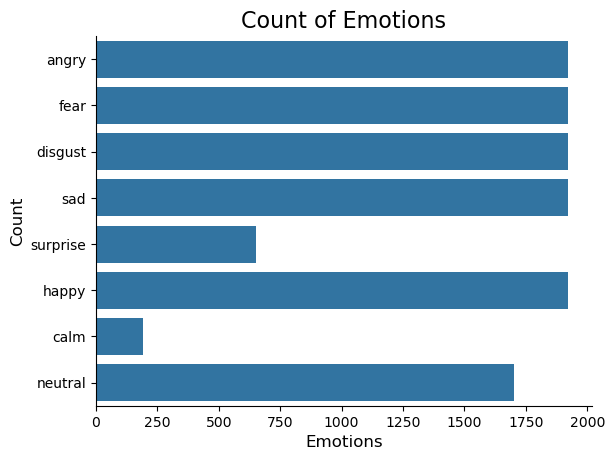

In [8]:
plt.title('Count of Emotions', size=16)
sns.countplot(data_path.Emotions)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [9]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def create_spectrogram(data, sr, e):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()

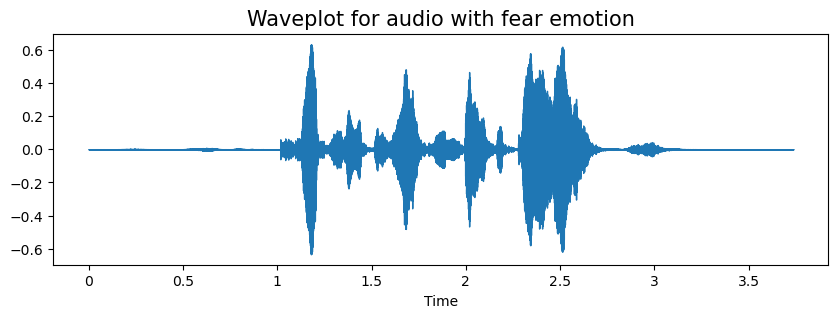

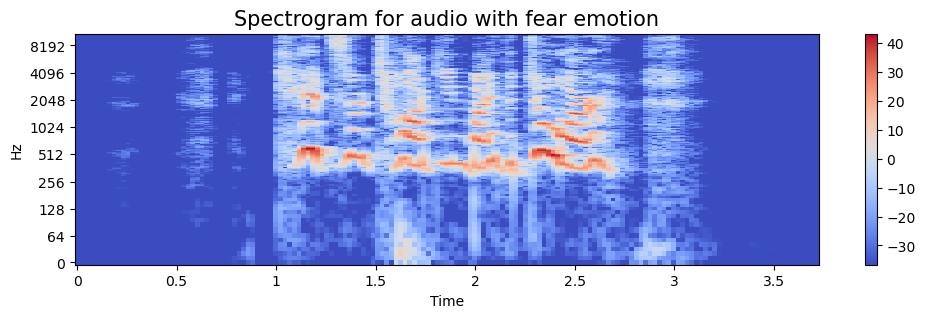

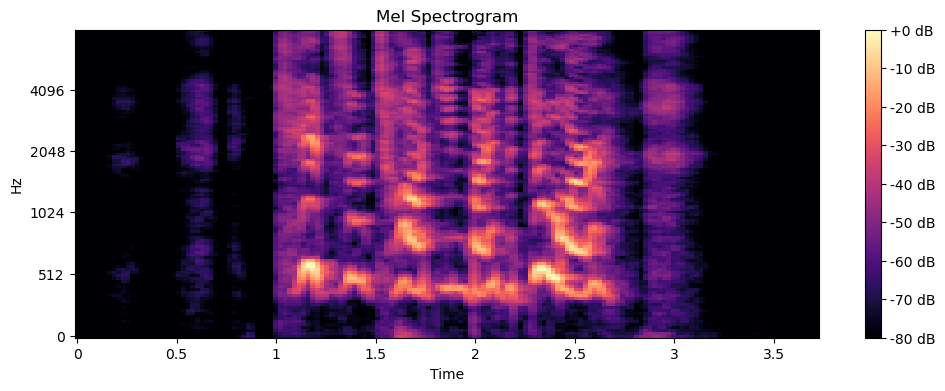

In [10]:
emotion='fear'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

S = librosa.feature.melspectrogram(
    y=data, 
    sr=sampling_rate, 
    n_mels=128, 
    fmax=8000
)

S_dB = librosa.power_to_db(S, ref=np.max)

plt.figure(figsize=(12, 4))
librosa.display.specshow(
    S_dB, 
    sr=sampling_rate, 
    x_axis="time", 
    y_axis="mel", 
    fmax=8000
)
plt.colorbar(format="%+2.0f dB")
plt.title("Mel Spectrogram")
plt.show()

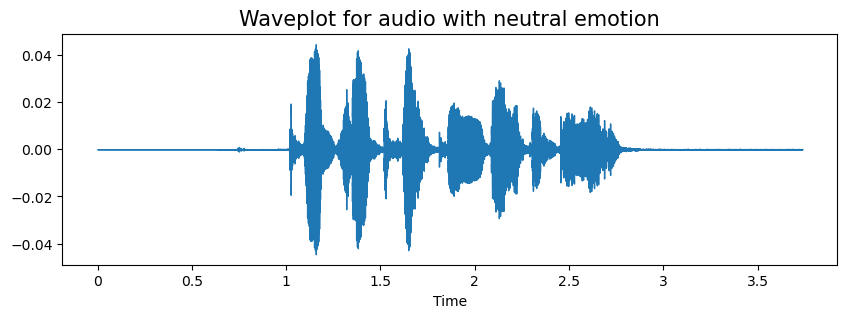

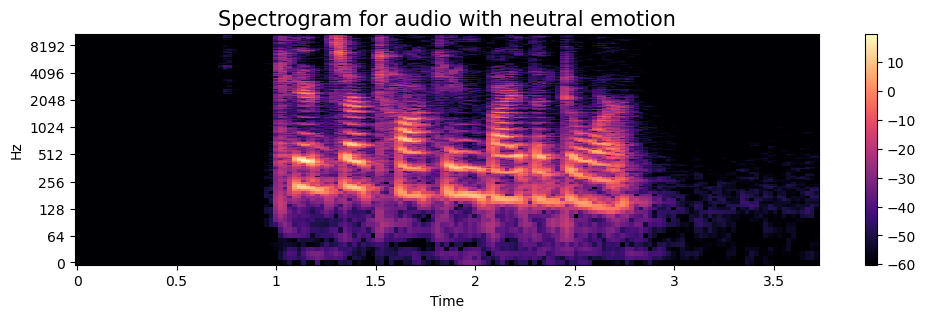

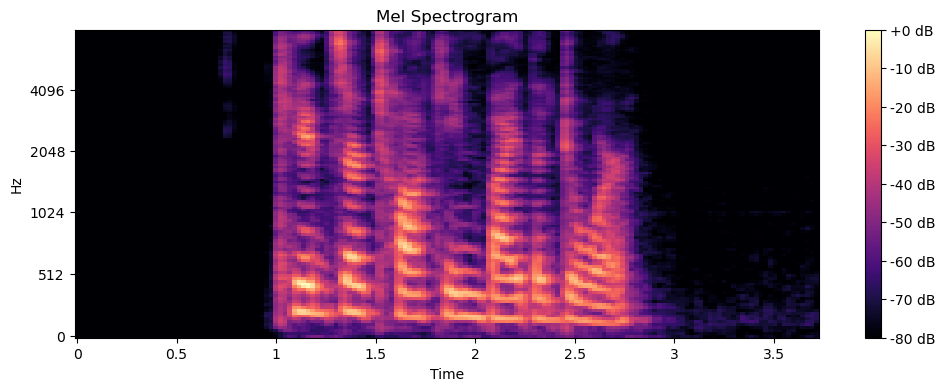

In [11]:
emotion='neutral'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

S = librosa.feature.melspectrogram(
    y=data, 
    sr=sampling_rate, 
    n_mels=128, 
    fmax=8000
)

S_dB = librosa.power_to_db(S, ref=np.max)

plt.figure(figsize=(12, 4))
librosa.display.specshow(
    S_dB, 
    sr=sampling_rate, 
    x_axis="time", 
    y_axis="mel", 
    fmax=8000
)
plt.colorbar(format="%+2.0f dB")
plt.title("Mel Spectrogram")
plt.show()

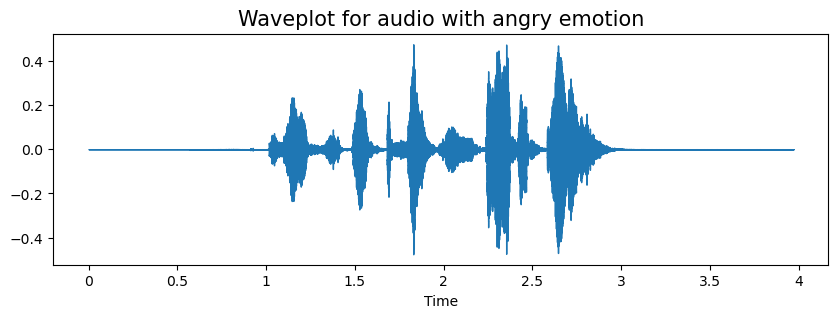

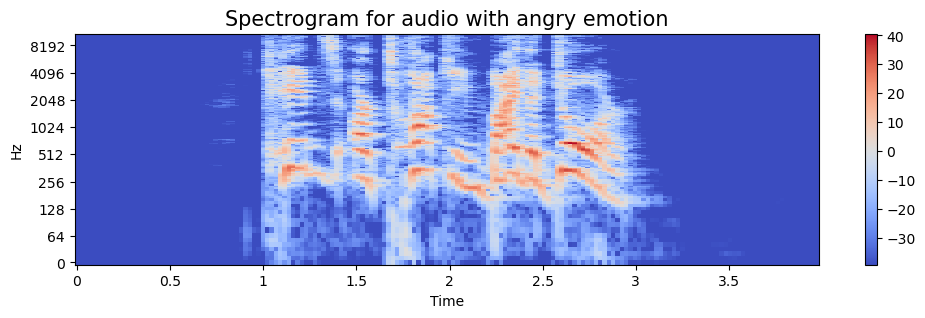

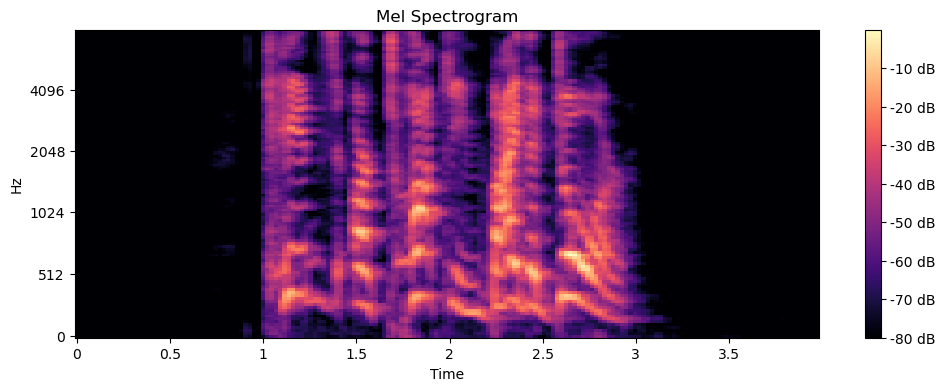

In [12]:
emotion='angry'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

S = librosa.feature.melspectrogram(
    y=data, 
    sr=sampling_rate, 
    n_mels=128, 
    fmax=8000
)

S_dB = librosa.power_to_db(S, ref=np.max)

plt.figure(figsize=(12, 4))
librosa.display.specshow(
    S_dB, 
    sr=sampling_rate, 
    x_axis="time", 
    y_axis="mel", 
    fmax=8000
)
plt.colorbar(format="%+2.0f dB")
plt.title("Mel Spectrogram")
plt.show()

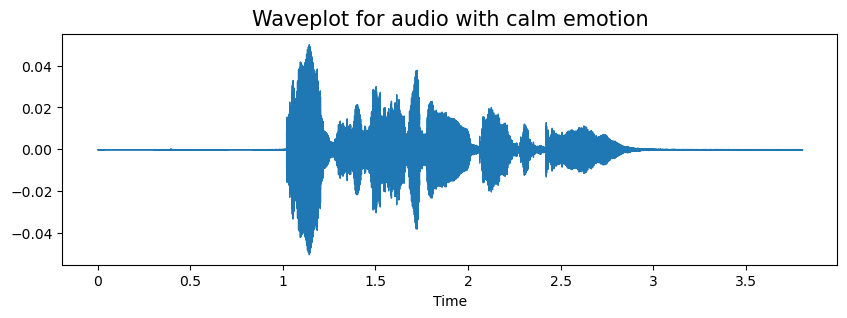

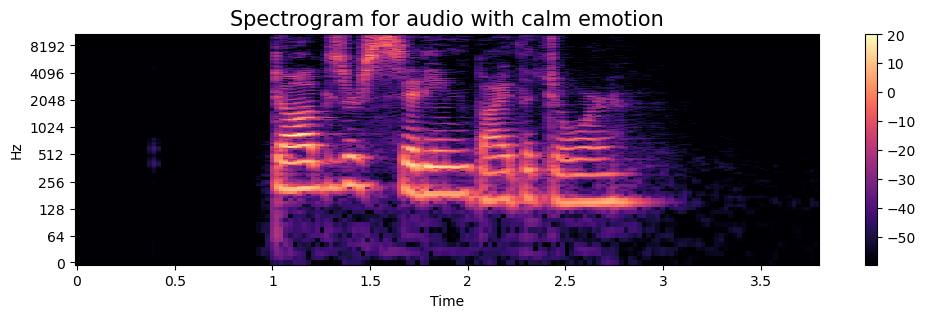

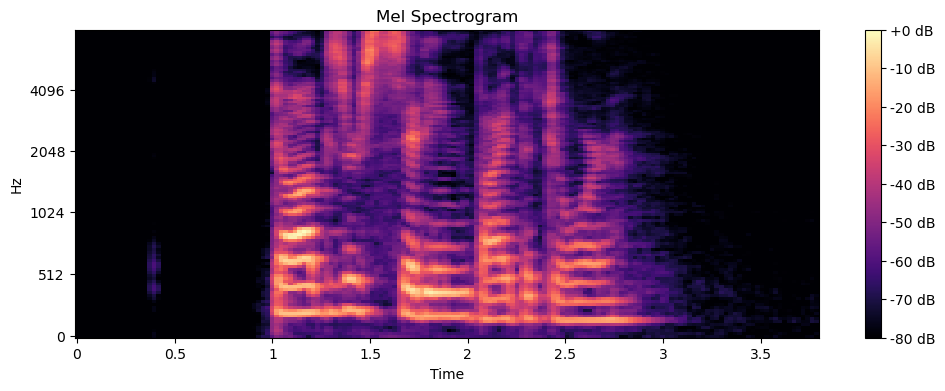

In [13]:
emotion='calm'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

S = librosa.feature.melspectrogram(
    y=data, 
    sr=sampling_rate, 
    n_mels=128, 
    fmax=8000
)

S_dB = librosa.power_to_db(S, ref=np.max)

plt.figure(figsize=(12, 4))
librosa.display.specshow(
    S_dB, 
    sr=sampling_rate, 
    x_axis="time", 
    y_axis="mel", 
    fmax=8000
)
plt.colorbar(format="%+2.0f dB")
plt.title("Mel Spectrogram")
plt.show()

### **Semi-NMF Code**

In [14]:
# ---------- Deep Semi-NMF pipeline matching the paper ----------
import numpy as np
import librosa
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.metrics import classification_report
import os

# ------------------ Feature extraction helpers ------------------
def load_and_trim(path, sr=22050, trim_first_sec=0.5):
    y, _ = librosa.load(path, sr=sr)
    y = y[int(trim_first_sec * sr):]   # remove first N seconds
    return y, sr

def extract_mfcc_features(path, sr=22050, n_mfcc=12):
    # returns per-utterance MFCC features as paper: 12 MFCC + 12 delta = 24 dims
    y, _ = librosa.load(path, sr=sr)
    # y, sr = load_and_trim(path, sr=sr)

    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)   # (n_mfcc, frames)
    delta = librosa.feature.delta(mfcc)

    mfcc_mean = np.mean(mfcc, axis=1)
    delta_mean = np.mean(delta, axis=1)
    return np.concatenate([mfcc_mean, delta_mean])  # (24,)

def lpc_to_lpcc(a, n_ceps):
    # a: LPC coefficients with a[0]=1, a[1..p] predictor coefficients
    # compute cepstral via recursion (paper eqn)
    p = len(a) - 1
    # ensure float
    a = np.asarray(a, dtype=float)
    # C0 = log(p) per paper: note may also use log of prediction error; using log(p) as in paper snippet
    C = np.zeros(n_ceps)
    C[0] = np.log(p) if p>0 else 0.0
    for m in range(1, n_ceps):
        if m <= p:
            s = 0.0
            for i in range(1, m):
                s += (i/m) * C[i] * a[m-i]
            C[m] = a[m] + s if m < len(a) else s
        else:
            s = 0.0
            for i in range(m-p, m):
                s += (i/m) * C[i] * a[m-i]
            C[m] = s
    return C  # length n_ceps

def extract_lpcc_features(path, sr=22050, lpc_order=20, n_lpcc=21, frame_length=256, hop_length=176):
    # Extract LPCC by computing LP coefficients per frame and averaging cepstral coeffs
    y, _ = librosa.load(path, sr=sr)
    # y, sr = load_and_trim(path, sr=sr)

    # frame the signal (librosa.util.frame expects pad)
    frames = librosa.util.frame(y, frame_length=frame_length, hop_length=hop_length).T  # (n_frames, frame_length)
    lpccs = []

    for f in frames:
        # compute LPC coefficients using librosa.lpc (returns a[0]=1, a1..ap)
        try:
            a = librosa.lpc(f, order=lpc_order)
        except Exception:
            # fallback: pad or use zeros
            a = np.zeros(lpc_order+1)
            a[0] = 1.0
        # convert to LPCC (n_lpcc)
        c = lpc_to_lpcc(a, n_ceps=n_lpcc)
        lpccs.append(c)
    lpccs = np.array(lpccs)

    # average across frames
    return np.mean(lpccs, axis=0)  # (n_lpcc,)

def teager_energy_operator(signal):
    # discrete TEO: psi[x[n]] = x[n]^2 - x[n-1]*x[n+1]
    x = np.asarray(signal)
    # pad ends
    x_prev = np.concatenate(([x[0]], x[:-1]))
    x_next = np.concatenate((x[1:], [x[-1]]))
    return x**2 - x_prev * x_next

def extract_teo_autocorr_features(path, sr=22050, frame_length=256, hop_length=176, n_autocorr=20):
    y, _ = librosa.load(path, sr=sr)
    # y, sr = load_and_trim(path, sr=sr)

    # compute TEO signal
    teo = teager_energy_operator(y)

    # frame teo
    frames = librosa.util.frame(teo, frame_length=frame_length, hop_length=hop_length).T  # (n_frames, frame_len)

    ac_feats = []
    for f in frames:
        # autocorrelation up to lag n_autocorr-1
        # normalize frame
        if np.all(f==0):
            ac = np.zeros(n_autocorr)
        else:
            f = f - np.mean(f)
            # full autocorr
            ac_full = np.correlate(f, f, mode='full')
            center = len(ac_full)//2
            ac = ac_full[center:center + n_autocorr]
            # normalize
            if ac[0] != 0:
                ac = ac / (np.abs(ac[0]) + 1e-12)
        ac_feats.append(ac)
    ac_feats = np.array(ac_feats)
    
    # average across frames
    return np.mean(ac_feats, axis=0)  # (n_autocorr,)

In [15]:
# ------------------ Semi-NMF with SVD init (M ≈ U @ V, V >= 0) ------------------
def semi_nmf_svd(M, r, max_iter=200, tol=1e-5, verbose=False, seed=0):
    """
    Factorize M (m x k) into U (m x r) and V (r x k) with V >= 0
    SVD-based initialization for V (right singular vectors), then alternate:
      V *= (U^T M) / (U^T U V)
      U = M V^T (V V^T)^{-1}
    Returns U, V
    """
    np.random.seed(seed)
    M = M.astype(float)
    m, k = M.shape

    # SVD initialization: get top-r right singular vectors (shape r x k)
    # np.linalg.svd returns U (m x m) or reduced U (m x k), s, Vt (k x k)
    U_svd, s, Vt = np.linalg.svd(M, full_matrices=False)
    B = Vt[:r, :].copy()  # (r x k); corresponds to paper's B

    # optionally flip rows based on sign to make them mostly positive (paper does row flips)
    for i in range(r):
        if np.abs(np.min(B[i, :])) < np.abs(np.max(B[i, :])):
            # prefer positive sign, else flip
            pass
        else:
            B[i, :] *= -1

    # make V nonnegative by shifting (small epsilon)
    V = np.abs(B) + 1e-6  # (r x k)
    # initialize U by LS solution: U = M V^T (V V^T)^{-1}
    VVT = V @ V.T
    pinvVVT = np.linalg.pinv(VVT)
    U = (M @ V.T) @ pinvVVT  # (m x r)

    prev_loss = np.inf
    for it in range(max_iter):
        # update V multiplicatively
        UtM = U.T @ M  # (r x k)
        UtU = U.T @ U  # (r x r)
        denom = (UtU @ V) + 1e-12
        V *= (UtM / denom)

        # update U by LS
        VVT = V @ V.T
        pinvVVT = np.linalg.pinv(VVT)
        U = (M @ V.T) @ pinvVVT

        # compute loss
        recon = U @ V
        loss = np.linalg.norm(M - recon, ord='fro')
        if verbose and (it % 20 == 0 or it == max_iter-1):
            print(f"iter {it} loss {loss:.6f}")
        if abs(prev_loss - loss) < tol:
            break
        prev_loss = loss

    return U, V

# ------------------ Build per-utterance feature matrices and run semi-NMF ------------------
def build_feature_matrices(data_df, cache_dir="seminmf_cache"):
    os.makedirs(cache_dir, exist_ok=True)
    cache_file = os.path.join(cache_dir, "feature_matrices.npz")
    if os.path.exists(cache_file):
        print("Loading cached feature matrices:", cache_file)
        d = np.load(cache_file, allow_pickle=True)
        return d['M_mfcc'], d['M_lpcc'], d['M_teo'], d['paths'], d['labels']

    paths = []
    labels = []
    M_mfcc = []
    M_lpcc = []
    M_teo = []

    for _, row in tqdm(data_df.iterrows(), total=len(data_df)):
        p = row.Path
        em = row.Emotions
        try:
            mf = extract_mfcc_features(p)         # (24,)
            lp = extract_lpcc_features(p)        # (21,)
            te = extract_teo_autocorr_features(p) # (20,)
            M_mfcc.append(mf)
            M_lpcc.append(lp)
            M_teo.append(te)
            paths.append(p)
            labels.append(em)
        except Exception as e:
            print("Error processing", p, e)
            continue

    M_mfcc = np.vstack(M_mfcc)  # (n_samples, 24)
    M_lpcc = np.vstack(M_lpcc)  # (n_samples, 21)
    M_teo  = np.vstack(M_teo)   # (n_samples, 20)

    np.savez_compressed(cache_file, M_mfcc=M_mfcc, M_lpcc=M_lpcc, M_teo=M_teo, paths=np.array(paths), labels=np.array(labels))
    print("Saved feature matrices to", cache_file)
    return M_mfcc, M_lpcc, M_teo, paths, labels

In [16]:
# ------------------ Run semi-NMF per family and evaluate ------------------
def run_paper_pipeline(data_df,
                       r_mfcc=19, r_lpcc=17, r_teo=17,
                       cv_folds=5,
                       cache_dir="seminmf_cache",
                       verbose=False):
    # build per-utterance matrices
    M_mfcc, M_lpcc, M_teo, paths, labels = build_feature_matrices(data_df, cache_dir=cache_dir)
    print("Shapes:", M_mfcc.shape, M_lpcc.shape, M_teo.shape)

    # apply semi-NMF with SVD init for each family (M shape: n_samples x k)
    print("Factorizing MFCC (r=%d)..." % r_mfcc)
    U_mfcc, V_mfcc = semi_nmf_svd(M_mfcc, r=r_mfcc, verbose=verbose)
    print("Factorizing LPCC (r=%d)..." % r_lpcc)
    U_lpcc, V_lpcc = semi_nmf_svd(M_lpcc, r=r_lpcc, verbose=verbose)
    print("Factorizing TEO (r=%d)..." % r_teo)
    U_teo, V_teo = semi_nmf_svd(M_teo, r=r_teo, verbose=verbose)

    # U_* are (n_samples x r_*)
    # Optionally standardize each U before concatenation
    scaler_u = StandardScaler()
    U_concat = np.hstack([scaler_u.fit_transform(U_mfcc),
                          scaler_u.fit_transform(U_lpcc),
                          scaler_u.fit_transform(U_teo)])
    print("Final feature matrix shape:", U_concat.shape)

    # encode labels
    le = LabelEncoder()
    y = le.fit_transform(labels)

    # evaluate with CV (SVM and k-NN) using stratified folds
    cv = StratifiedKFold(n_splits=cv_folds, shuffle=True, random_state=0)
    svm = SVC(kernel='rbf', probability=False, random_state=0)
    knn = KNeighborsClassifier(n_neighbors=6)

    print("Running %d-fold CV SVM..." % cv_folds)
    s_scores = cross_val_score(svm, U_concat, y, cv=cv, scoring='accuracy', n_jobs=-1)
    print("SVM CV mean acc = %.4f (std %.4f)" % (s_scores.mean(), s_scores.std()))

    print("Running %d-fold CV k-NN..." % cv_folds)
    k_scores = cross_val_score(knn, U_concat, y, cv=cv, scoring='accuracy', n_jobs=-1)
    print("k-NN CV mean acc = %.4f (std %.4f)" % (k_scores.mean(), k_scores.std()))

    # final train/test split for a classification report
    X_train, X_test, y_train, y_test = train_test_split(U_concat, y, test_size=0.2, stratify=y, random_state=0)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    print("Classification report (SVM):")
    print(classification_report(y_test, y_pred, target_names=le.classes_))

    return {
        'U_concat': U_concat,
        'labels': labels,
        'le': le,
        'svm_cv': s_scores,
        'knn_cv': k_scores,
        'svm_model': svm
    }

In [25]:
# ------------------ Run semi-NMF variant ------------------
results_seminmf = run_paper_pipeline(data_path, r_mfcc=19, r_lpcc=17, r_teo=17, cv_folds=5, cache_dir="seminmf_cache", verbose=False)

100%|██████████| 12162/12162 [07:32<00:00, 26.86it/s]


Saved feature matrices to seminmf_cache/feature_matrices.npz
Shapes: (12162, 24) (12162, 21) (12162, 20)
Factorizing MFCC (r=19)...
Factorizing LPCC (r=17)...
Factorizing TEO (r=17)...
Final feature matrix shape: (12162, 53)
Running 5-fold CV SVM...
SVM CV mean acc = 0.5039 (std 0.0038)
Running 5-fold CV k-NN...
k-NN CV mean acc = 0.4378 (std 0.0076)
Classification report (SVM):
              precision    recall  f1-score   support

       angry       0.59      0.67      0.63       385
        calm       0.37      0.68      0.48        38
     disgust       0.41      0.45      0.43       385
        fear       0.47      0.35      0.40       385
       happy       0.45      0.41      0.43       385
     neutral       0.52      0.41      0.46       340
         sad       0.54      0.63      0.58       385
    surprise       0.52      0.56      0.54       130

    accuracy                           0.50      2433
   macro avg       0.48      0.52      0.49      2433
weighted avg       0.4

### **Supervised-NMF Code**

In [18]:
# ------------------ DSNMF cross-validated pipeline (with full metrics) ------------------
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix
)

# ---------- DSNMF (Hou et al.) implementation and integration ----------
import numpy as np

def build_label_indicator_matrix(y):
    """
    y: shape (n_samples,) integer labels from 0..c-1
    returns S: shape (c, n_samples) one-hot indicator matrix
    """
    classes, inv = np.unique(y, return_inverse=True)
    c = len(classes)
    n = len(y)
    S = np.zeros((c, n), dtype=float)
    for j, cls_idx in enumerate(inv):
        S[cls_idx, j] = 1.0
    return S, classes

def build_similarity_matrix(y):
    """
    C_{ij} = 1 if sample i and j have same label, else 0
    returns C shape (n, n)
    """
    n = len(y)
    C = np.zeros((n, n), dtype=float)
    for i in range(n):
        for j in range(n):
            C[i, j] = 1.0 if y[i] == y[j] else 0.0
    return C

def dsnmf(M, y, r, gamma=10.0, beta=0.1, max_iter=200, tol=1e-5, verbose=False, seed=0):
    """
    DSNMF per Hou et al. (DSNMF): multiplicative updates for W (m x r), H (r x n), A (c x r).
    Input:
      M : (n_samples x n_features) data matrix (utterance-level features)
      y : (n_samples,) integer labels
      r : target low-dim rank
      gamma, beta : supervision and similarity weights (paper uses gamma, beta)
    Returns:
      W (m x r), H (r x n) where paper's X = W H and X is (m x n) (features x samples)
      and U = H.T (n_samples x r) is the per-sample low-dim representation
    Notes: This implementation follows update rules (15)-(17) in Hou et al. :contentReference[oaicite:1]{index=1}
    """
    np.random.seed(seed)
    # convert M (n_samples x n_features) -> X (m x n) where m = n_features, n = n_samples
    X = M.T.astype(float)  # shape (m, n)
    m, n = X.shape

    # Build S (c x n) indicator matrix and similarity matrix C (n x n)
    S, classes = build_label_indicator_matrix(y)
    C = build_similarity_matrix(y)  # n x n

    c = S.shape[0]

    eps = 1e-10
    # initialize W (m x r), H (r x n), A (c x r) with small positive values
    W = np.random.rand(m, r) + 1e-2
    H = np.random.rand(r, n) + 1e-2
    A = np.random.rand(c, r) + 1e-2

    prev_loss = np.inf
    for it in range(max_iter):
        # Precompute common terms
        WT = W.T
        AT = A.T

        # Numerator and denom for H update:
        # H *= (W^T X + gamma * A^T S) / (W^T W H + gamma * A^T A H + beta * H C)
        num_H = WT @ X + gamma * (AT @ S)    # (r x n)
        denom_H = (WT @ W) @ H + gamma * (AT @ A) @ H + beta * (H @ C) + eps

        H *= num_H / denom_H
        H = np.clip(H, eps, None)

        # Update W:
        # W *= (X H^T) / (W H H^T)
        num_W = X @ H.T                       # (m x r)
        denom_W = W @ (H @ H.T) + eps         # (m x r)
        W *= num_W / denom_W
        W = np.clip(W, eps, None)

        # Update A:
        # A *= (S H^T) / (A H H^T)
        num_A = S @ H.T                       # (c x r)
        denom_A = A @ (H @ H.T) + eps         # (c x r)
        A *= num_A / denom_A
        A = np.clip(A, eps, None)

        # compute objective (optional - for convergence checking)
        recon = W @ H
        recon_loss = np.linalg.norm(X - recon, ord='fro')**2
        disc_loss = gamma * np.linalg.norm(S - A @ H, ord='fro')**2
        sim_loss = beta * np.sum(np.abs(H @ C @ H.T))   # L1 norm on H C H^T approximated by sum(abs(.))
        loss = recon_loss + disc_loss + sim_loss

        if verbose and (it % 10 == 0 or it == max_iter-1):
            print(f"DSNMF iter {it} loss {loss:.6f} recon {recon_loss:.4f} disc {disc_loss:.4f} sim {sim_loss:.4f}")

        if abs(prev_loss - loss) < tol:
            break
        prev_loss = loss

    # Per-paper projection matrix W_pinv = (W^T W)^{-1} W^T, and projected features X' = W_pinv X
    # W_pinv shape (r x m), X shape (m x n) -> Xp shape (r x n)
    try:
        WtW_inv = np.linalg.inv(W.T @ W)
        W_pinv = WtW_inv @ W.T
    except np.linalg.LinAlgError:
        W_pinv = np.linalg.pinv(W)  # fallback (r x m)
    Xp = W_pinv @ X   # r x n

    # return W (m x r), H (r x n), and per-sample features U = Xp.T (n x r)
    U = Xp.T
    return W, H, A, U, {'loss': loss, 'iterations': it+1}


def project_with_W_pinv(W, X):
    X_t = X.T
    try:
        WtW_inv = np.linalg.inv(W.T @ W)
        W_pinv = WtW_inv @ W.T
    except np.linalg.LinAlgError:
        W_pinv = np.linalg.pinv(W)
    return (W_pinv @ X_t).T


def run_dsnmf_pipeline_cv(data_df,
                          r_mfcc=19, r_lpcc=17, r_teo=17,
                          cv_folds=5,
                          dsnmf_params=None,
                          classifier='svm',
                          scale_each_family=True,
                          random_state=0,
                          verbose=False,
                          cache_dir="seminmf_cache"):

    if dsnmf_params is None:
        dsnmf_params = {'gamma': 10.0, 'beta': 0.1,
                        'max_iter': 200, 'tol': 1e-5, 'seed': 0}

    # ---- Load feature matrices ----
    M_mfcc, M_lpcc, M_teo, paths, labels = build_feature_matrices(data_df, cache_dir=cache_dir)
    n = len(labels)

    le = LabelEncoder()
    y_all = le.fit_transform(labels)

    # ---- CV setup ----
    skf = StratifiedKFold(n_splits=cv_folds, shuffle=True, random_state=random_state)

    fold_results = []
    all_y_true = []
    all_y_pred_svm = [] if classifier in ('svm','both') else None
    all_y_pred_knn = [] if classifier in ('knn','both') else None

    ### NEW: store fold-level metrics
    fold_metrics = {
        'svm': {'acc': [], 'prec': [], 'rec': [], 'f1': []},
        'knn': {'acc': [], 'prec': [], 'rec': [], 'f1': []}
    }

    fold_idx = 0
    for train_idx, test_idx in skf.split(np.zeros(n), y_all):
        fold_idx += 1
        if verbose:
            print(f"\n=== Fold {fold_idx}/{cv_folds} ===")

        # ---- Split ----
        X_mfcc_train = M_mfcc[train_idx]
        X_lpcc_train = M_lpcc[train_idx]
        X_teo_train  = M_teo[train_idx]

        X_mfcc_test = M_mfcc[test_idx]
        X_lpcc_test = M_lpcc[test_idx]
        X_teo_test  = M_teo[test_idx]

        y_train = y_all[train_idx]
        y_test  = y_all[test_idx]

        # ---- Train DSNMF (no leak) ----
        W_mfcc, H_mfcc, A_mfcc, U_mfcc_train, info_mfcc = dsnmf(
            X_mfcc_train, y_train, r=r_mfcc,
            gamma=dsnmf_params['gamma'], beta=dsnmf_params['beta'],
            max_iter=dsnmf_params['max_iter'], tol=dsnmf_params['tol'],
            verbose=verbose, seed=dsnmf_params['seed']
        )
        U_mfcc_test = project_with_W_pinv(W_mfcc, X_mfcc_test)

        W_lpcc, H_lpcc, A_lpcc, U_lpcc_train, info_lpcc = dsnmf(
            X_lpcc_train, y_train, r=r_lpcc,
            gamma=dsnmf_params['gamma'], beta=dsnmf_params['beta'],
            max_iter=dsnmf_params['max_iter'], tol=dsnmf_params['tol'],
            verbose=verbose, seed=dsnmf_params['seed'] + 1
        )
        U_lpcc_test = project_with_W_pinv(W_lpcc, X_lpcc_test)

        W_teo, H_teo, A_teo, U_teo_train, info_teo = dsnmf(
            X_teo_train, y_train, r=r_teo,
            gamma=dsnmf_params['gamma'], beta=dsnmf_params['beta'],
            max_iter=dsnmf_params['max_iter'], tol=dsnmf_params['tol'],
            verbose=verbose, seed=dsnmf_params['seed'] + 2
        )
        U_teo_test = project_with_W_pinv(W_teo, X_teo_test)

        # ---- Scale families ----
        if scale_each_family:
            s1 = StandardScaler().fit(U_mfcc_train)
            s2 = StandardScaler().fit(U_lpcc_train)
            s3 = StandardScaler().fit(U_teo_train)

            U_mfcc_train = s1.transform(U_mfcc_train)
            U_mfcc_test  = s1.transform(U_mfcc_test)

            U_lpcc_train = s2.transform(U_lpcc_train)
            U_lpcc_test  = s2.transform(U_lpcc_test)

            U_teo_train = s3.transform(U_teo_train)
            U_teo_test  = s3.transform(U_teo_test)

        # ---- Concatenate ----
        X_train_fold = np.hstack([U_mfcc_train, U_lpcc_train, U_teo_train])
        X_test_fold  = np.hstack([U_mfcc_test,  U_lpcc_test,  U_teo_test])

        # ---------------------------------------------------------
        #                  CLASSIFIERS + METRICS
        # ---------------------------------------------------------

        acc_svm = acc_knn = None

        if classifier in ('svm','both'):
            svm = SVC(kernel='rbf')
            svm.fit(X_train_fold, y_train)
            y_pred_svm = svm.predict(X_test_fold)

            all_y_pred_svm.extend(y_pred_svm)

            ### NEW: compute metrics
            acc = accuracy_score(y_test, y_pred_svm)
            prec = precision_score(y_test, y_pred_svm, average='macro')
            rec = recall_score(y_test, y_pred_svm, average='macro')
            f1 = f1_score(y_test, y_pred_svm, average='macro')

            fold_metrics['svm']['acc'].append(acc)
            fold_metrics['svm']['prec'].append(prec)
            fold_metrics['svm']['rec'].append(rec)
            fold_metrics['svm']['f1'].append(f1)

            acc_svm = acc

            if verbose:
                print(f" SVM: acc={acc:.4f} prec={prec:.4f} rec={rec:.4f} f1={f1:.4f}")

        if classifier in ('knn','both'):
            knn = KNeighborsClassifier(n_neighbors=6)
            knn.fit(X_train_fold, y_train)
            y_pred_knn = knn.predict(X_test_fold)

            all_y_pred_knn.extend(y_pred_knn)

            ### NEW: compute metrics
            acc = accuracy_score(y_test, y_pred_knn)
            prec = precision_score(y_test, y_pred_knn, average='macro')
            rec = recall_score(y_test, y_pred_knn, average='macro')
            f1 = f1_score(y_test, y_pred_knn, average='macro')

            fold_metrics['knn']['acc'].append(acc)
            fold_metrics['knn']['prec'].append(prec)
            fold_metrics['knn']['rec'].append(rec)
            fold_metrics['knn']['f1'].append(f1)

            acc_knn = acc

            if verbose:
                print(f" KNN: acc={acc:.4f} prec={prec:.4f} rec={rec:.4f} f1={f1:.4f}")

        # ---- Save fold results ----
        fold_results.append({
            'fold': fold_idx,
            'n_train': len(train_idx),
            'n_test': len(test_idx),
            'acc_svm': acc_svm,
            'acc_knn': acc_knn
        })

        all_y_true.extend(y_test)

    # ---------------------------------------------------------
    #               AGGREGATED METRICS (macro)
    # ---------------------------------------------------------
    results = {
        'folds': fold_results,
        'classes': le.classes_,
        'fold_metrics': fold_metrics
    }

    if classifier in ('svm','both'):
        y_true = np.array(all_y_true)
        y_pred = np.array(all_y_pred_svm)
        results['svm_overall_acc'] = accuracy_score(y_true, y_pred)
        results['svm_report'] = classification_report(y_true, y_pred, target_names=le.classes_)
        results['svm_confusion'] = confusion_matrix(y_true, y_pred)

    if classifier in ('knn','both'):
        y_true = np.array(all_y_true)
        y_pred = np.array(all_y_pred_knn)
        results['knn_overall_acc'] = accuracy_score(y_true, y_pred)
        results['knn_report'] = classification_report(y_true, y_pred, target_names=le.classes_)
        results['knn_confusion'] = confusion_matrix(y_true, y_pred)

    # ---------------- PRINT PER-CLASS REPORTS (MATCH SEMI-NMF FORMAT) ----------------
    if classifier in ('svm','both'):
        print("\n=== DSNMF Classification Report (SVM) ===")
        print(results['svm_report'])

    if classifier in ('knn','both'):
        print("\n=== DSNMF Classification Report (k-NN) ===")
        print(results['knn_report'])

    # ---------------- PRINT SUMMARY ----------------
    print("\n=== DSNMF CV Summary ===")

    for fr in fold_results:
        line = f"Fold {fr['fold']:02d} | train {fr['n_train']:04d} | test {fr['n_test']:04d}"
        if fr['acc_svm'] is not None:
            line += f" | svm_acc {fr['acc_svm']:.4f}"
        if fr['acc_knn'] is not None:
            line += f" | knn_acc {fr['acc_knn']:.4f}"
        print(line)

    print("\n=== Average Per-Fold Metrics (Macro) ===")
    for clf in ['svm','knn']:
        if classifier in (clf,'both'):
            print(f"\n{clf.upper()}:")
            print("  Acc :", np.mean(fold_metrics[clf]['acc']))
            print("  Prec:", np.mean(fold_metrics[clf]['prec']))
            print("  Rec :", np.mean(fold_metrics[clf]['rec']))
            print("  F1  :", np.mean(fold_metrics[clf]['f1']))

    return results


In [26]:
# ------------------ Run supervised-NMF variant ------------------
results_dsnmf = run_dsnmf_pipeline_cv(
    data_path,
    r_mfcc=19, r_lpcc=17, r_teo=17,
    cv_folds=5,
    dsnmf_params={'gamma':10.0, 'beta':0.1, 'max_iter':200, 'tol':1e-5, 'seed':0},
    classifier='both',         # or 'both'
    scale_each_family=True,
    verbose=True,
    cache_dir="seminmf_cache"
)


Loading cached feature matrices: seminmf_cache/feature_matrices.npz

=== Fold 1/5 ===
DSNMF iter 0 loss 1818894785.989649 recon 1818716013.7720 disc 87560.8038 sim 91211.4139
DSNMF iter 10 loss 1791334610.770572 recon 1791099823.8017 disc 81619.2209 sim 153167.7480
DSNMF iter 20 loss 1790974051.477362 recon 1790736836.7747 disc 81288.3601 sim 155926.3426
DSNMF iter 30 loss 1790792271.501346 recon 1790554228.7596 disc 81294.3578 sim 156748.3839
DSNMF iter 40 loss 1790648438.279717 recon 1790410407.5123 disc 81194.1244 sim 156836.6430
DSNMF iter 50 loss 1790512166.862705 recon 1790274655.6699 disc 80918.4037 sim 156592.7891
DSNMF iter 60 loss 1790391166.247560 recon 1790154733.0270 disc 80270.7193 sim 156162.5012
DSNMF iter 70 loss 1790277738.737526 recon 1790043100.8799 disc 79026.6481 sim 155611.2095
DSNMF iter 80 loss 1790171356.827410 recon 1789938805.7929 disc 77567.4460 sim 154983.5885
DSNMF iter 90 loss 1790072838.467986 recon 1789842395.7166 disc 76127.8988 sim 154314.8526
DSNMF 

### **Standard-NMF Code**

In [29]:
import numpy as np
import pandas as pd
import librosa
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import NMF
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix
)

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
# from sklearn.ensemble import RandomForestClassifier

In [30]:
# -----------------------
# STEP 1 — FEATURE EXTRACTION
# -----------------------
def extract_mel_spectrogram_features(
    file_path, n_mels=128, n_fft=2048, hop_length=512
):
    """
    Extract mel spectrogram features and return a flattened vector.
    Uses statistical reduction to avoid extremely high-dimensional inputs.
    """
    try:
        y, sr = librosa.load(file_path, duration=3, offset=0.5)

        mel_spec = librosa.feature.melspectrogram(
            y=y, sr=sr,
            n_mels=n_mels,
            n_fft=n_fft,
            hop_length=hop_length,
            fmax=8000
        )

        mel_db = librosa.power_to_db(mel_spec, ref=np.max)

        # Aggregate statistics over time (much lower dimensional)
        features = np.concatenate([
            np.mean(mel_db, axis=1),
            np.std(mel_db, axis=1),
            np.max(mel_db, axis=1),
            np.min(mel_db, axis=1)
        ])
        return features
    except Exception as e:
        print(f"[ERROR] {file_path}: {e}")
        return None

In [31]:
# -----------------------
# STEP 2 — FULL PIPELINE
# -----------------------
def run_standard_nmf_pipeline(data_df):
    print("\n===== Running Baseline NMF Pipeline =====")

    # ---------------------------
    # Extract Features
    # ---------------------------
    print("\n[1] Extracting mel spectrogram features...")
    X_features = []
    y_labels = []

    for idx, row in data_df.iterrows():
        feats = extract_mel_spectrogram_features(row['Path'])
        if feats is not None:
            X_features.append(feats)
            y_labels.append(row['Emotions'])

    X = np.array(X_features)
    y = np.array(y_labels)
    print(f"Extracted {X.shape[0]} feature vectors | Dim = {X.shape[1]}")

    # ---------------------------
    # Preprocessing for NMF
    # ---------------------------
    print("\n[2] Scaling + shifting to non-negative space for NMF...")

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Ensure non-negativity
    X_nonneg = X_scaled - X_scaled.min() + 1e-10

    # Encode labels
    le = LabelEncoder()
    y_enc = le.fit_transform(y)

    print(f"Classes: {list(le.classes_)}")

    # ---------------------------
    # Train / Test Split
    # ---------------------------
    print("\n[3] Train-test split...")
    X_train, X_test, y_train, y_test = train_test_split(
        X_nonneg, y_enc,
        test_size=0.2,
        random_state=42,
        stratify=y_enc
    )
    print(f"Train size = {len(X_train)}, Test size = {len(X_test)}")

    # ---------------------------
    # NMF Decomposition
    # ---------------------------
    print("\n[4] Fitting NMF model...")
    n_components = len(np.unique(y_enc))  # #classes
    print(f"Using {n_components} NMF components")

    nmf = NMF(
        n_components=n_components,
        init="nndsvda",
        max_iter=1000,
        random_state=42
    )
    W_train = nmf.fit_transform(X_train)
    W_test = nmf.transform(X_test)

    print(f"NMF W_train shape: {W_train.shape}")
    print(f"Reconstruction Error: {nmf.reconstruction_err_:.4f}")

    # ---------------------------
    # Classification
    # ---------------------------
    print("\n[5] Training classifiers on NMF features...")

    classifiers = {
        "SVM (RBF)": SVC(kernel='rbf', C=1.0, gamma='scale', probability=True, random_state=42),
        # "Random Forest": RandomForestClassifier(
        #     n_estimators=50, max_depth=5,
        #     min_samples_split=20, min_samples_leaf=10,
        #     max_features='sqrt', random_state=42
        # ),
        "KNN (k=10)": KNeighborsClassifier(n_neighbors=10)
    }

    results = {}

    for name, clf in classifiers.items():
        print(f"\n→ Training {name}")
        clf.fit(W_train, y_train)

        y_pred_train = clf.predict(W_train)
        y_pred_test = clf.predict(W_test)

        train_acc = accuracy_score(y_train, y_pred_train)
        test_acc = accuracy_score(y_test, y_pred_test)

        results[name] = {
            "train_accuracy": train_acc,
            "test_accuracy": test_acc,
            "y_pred_test": y_pred_test,
            "clf": clf
        }

        print(f"  Train Acc: {train_acc:.4f}")
        print(f"  Test Acc : {test_acc:.4f}")

    # Pick best classifier
    best_name, best_info = max(results.items(), key=lambda kv: kv[1]["test_accuracy"])
    print(f"\n===== Best Classifier: {best_name} ({best_info['test_accuracy']:.4f}) =====")

    # ---------------------------
    # Classification Report
    # ---------------------------
    print("\n[6] Detailed per-emotion performance...")

    report_dict = classification_report(
        y_test,
        best_info["y_pred_test"],
        target_names=le.classes_,
        output_dict=True
    )

    df_report = pd.DataFrame(report_dict).T
    df_report = df_report.round(4)
    display(df_report)

    # ---------------------------
    # Confusion Matrix
    # ---------------------------
    print("\n[7] Confusion Matrix:")

    cm = confusion_matrix(y_test, best_info["y_pred_test"])
    plt.figure(figsize=(9, 8))
    sns.heatmap(
        cm, annot=True, fmt="d", cmap="Blues",
        xticklabels=le.classes_,
        yticklabels=le.classes_
    )
    plt.title(f"Confusion Matrix — {best_name} (NMF Baseline)")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.tight_layout()
    plt.show()

    return {
        "nmf_model": nmf,
        "results": results,
        "best_name": best_name,
        "best_result": best_info,
        "label_encoder": le,
        "report": df_report
    }



===== Running Baseline NMF Pipeline =====

[1] Extracting mel spectrogram features...
Extracted 12162 feature vectors | Dim = 512

[2] Scaling + shifting to non-negative space for NMF...
Classes: ['angry', 'calm', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

[3] Train-test split...
Train size = 9729, Test size = 2433

[4] Fitting NMF model...
Using 8 NMF components
NMF W_train shape: (9729, 8)
Reconstruction Error: 1060.8030

[5] Training classifiers on NMF features...

→ Training SVM (RBF)
  Train Acc: 0.3950
  Test Acc : 0.3354

→ Training KNN (k=10)
  Train Acc: 0.5180
  Test Acc : 0.2585

===== Best Classifier: SVM (RBF) (0.3354) =====

[6] Detailed per-emotion performance...


,precision,recall,f1-score,support
angry,0.4426,0.5506,0.4907,385.0000
calm,0.0000,0.0000,0.0000,38.0000
disgust,0.2116,0.2364,0.2233,385.0000
fear,0.2661,0.1506,0.1924,385.0000
happy,0.2873,0.2000,0.2358,385.0000
neutral,0.2579,0.2647,0.2612,340.0000
sad,0.4152,0.6805,0.5157,385.0000
surprise,0.4561,0.2000,0.2781,130.0000
accuracy,0.3354,0.3354,0.3354,0.3354
macro avg,0.2921,0.2854,0.2747,2433.0000



[7] Confusion Matrix:


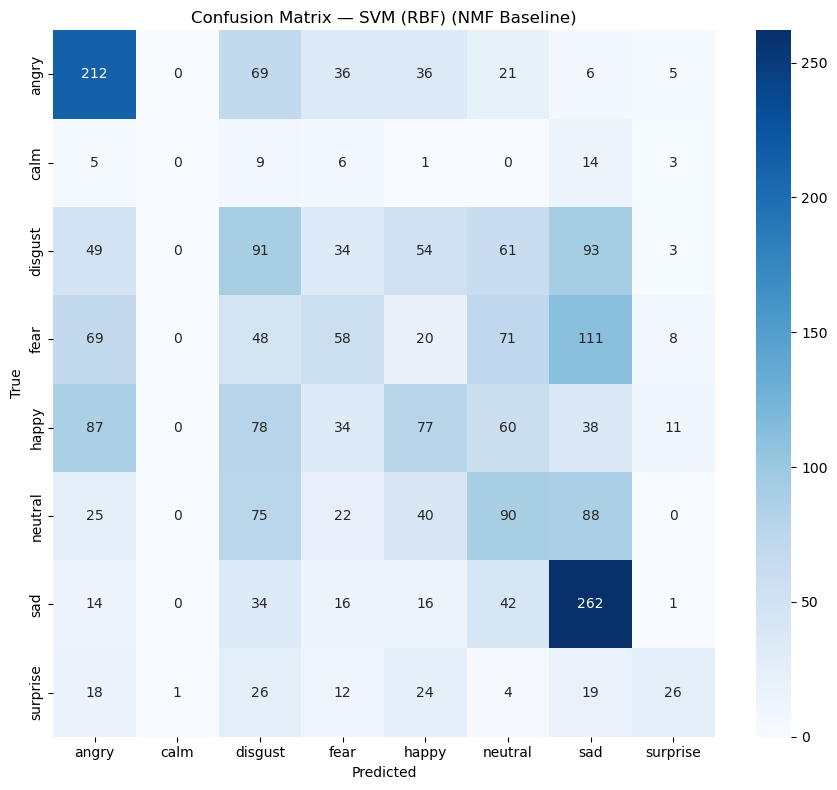

In [32]:
# ------------------ Run standard-NMF variant ------------------
results_nmf = run_standard_nmf_pipeline(data_path)